In [36]:
# Импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
sns.set_style("whitegrid")

%matplotlib inline

SEED = 42

import sklearn
# from sklearn import metrics #метрики
# from sklearn import model_selection #методы разделения и валидации
# from sklearn import linear_model #линейные модели
# from sklearn import tree #деревья решений

# from scipy import stats
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.metrics import mean_squared_error, r2_score, make_scorer

# from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_validate
# from sklearn.pipeline import Pipeline

import sympy

from sympy import (
    Symbol, 
    S,
    simplify, 
    latex,
    sin,
    cos,
    exp,
    log,
    sqrt,
    FiniteSet,
    Union,
    Interval,
    Contains,
    ConditionSet,
    Eq,
    solveset, solve,
    diff,
    limit,
    im,
    N,
    oo
)

from sympy.calculus.util import (
    function_range,
    continuous_domain
)

import scipy

from scipy.optimize import minimize, least_squares

from IPython.display import display, Markdown

import sys
import os
from pathlib import Path

# Определяем путь к директории ноутбука
# Простое решение: определяем папку, где находится файл ноутбука
notebook_dir = None

# Способ 1: Используем библиотеку ipynbname (самый надежный способ)
# Если библиотека не установлена, она будет установлена автоматически
try:
    import ipynbname
    nb_path = ipynbname.path()
    if nb_path:
        notebook_dir = str(Path(nb_path).parent.resolve())
except ImportError:
    # Устанавливаем библиотеку, если её нет
    import subprocess
    import sys
    print("📦 Устанавливаю библиотеку ipynbname для определения пути к ноутбуку...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "ipynbname", "-q"])
    import ipynbname
    nb_path = ipynbname.path()
    if nb_path:
        notebook_dir = str(Path(nb_path).parent.resolve())
except Exception as e:
    print(f"⚠️  Не удалось использовать ipynbname: {e}")

# Способ 2: Пробуем получить путь через IPython (запасной вариант)
if notebook_dir is None:
    try:
        from IPython import get_ipython
        ipython = get_ipython()
        if ipython is not None:
            if hasattr(ipython, 'start_dir'):
                notebook_dir = str(Path(ipython.start_dir).resolve())
    except:
        pass

# Способ 3: Если не удалось определить, выводим ошибку
if notebook_dir is None:
    print(f"❌ ОШИБКА: Не удалось определить папку ноутбука!")
    print(f"   Текущая рабочая директория: {os.getcwd()}")
    print(f"   Установите библиотеку: pip install ipynbname")
    raise RuntimeError("Не удалось определить директорию ноутбука. Установите: pip install ipynbname")

# Выводим информацию для диагностики
print(f"📂 Директория ноутбука: {notebook_dir}")
print(f"📂 Текущая рабочая директория (до chdir): {os.getcwd()}")

# Добавляем путь к директории ноутбука в sys.path (в начало для приоритета)
if notebook_dir not in sys.path:
    sys.path.insert(0, notebook_dir)

# Меняем рабочую директорию на директорию ноутбука, чтобы относительные пути работали
os.chdir(notebook_dir)
print(f"📂 Рабочая директория установлена: {os.getcwd()}")

# Импортируем helper (если существует)
try:
    from helper.functionanalyzer import FunctionAnalyzer
except ImportError:
    print("⚠️  Модуль helper.functionanalyzer не найден (это нормально, если он не используется)")


from tqdm import tqdm
import time

print(f'Numpy version {np.__version__}')
print(f'Pandas version {pd.__version__}')
print(f'sklearn version {sklearn.__version__}')
print(f'scipy version {scipy.__version__}')
print(f'sympy version {sympy.__version__}')

from sklearnex import patch_sklearn, config_context
patch_sklearn()

import cupy as cp

# Пробуем импортировать nvmath независимо от версии Python
# (модуль может быть обновлен и поддерживать более новые версии)
try:
    import nvmath
    print(f"✅ Модуль nvmath успешно импортирован (Python {sys.version_info.major}.{sys.version_info.minor})")
except ImportError as e:
    # Проверяем, связана ли ошибка с версией Python
    if sys.version_info >= (3, 13):
        print(f"⚠️  Модуль nvmath не установлен или не поддерживает Python {sys.version_info.major}.{sys.version_info.minor}")
        print(f"   Попробуйте обновить nvmath: pip install --upgrade nvmath")
        print(f"   Или используйте Python 3.12 или ниже для полной совместимости")
    else:
        print(f"⚠️  Модуль nvmath не установлен (Python {sys.version_info.major}.{sys.version_info.minor})")
        print(f"   Установите: pip install nvmath")
except Exception as e:
    print(f"⚠️  Ошибка при импорте nvmath: {e}")

12:53:07 | DEBUG    | logging:callHandlers - Loaded backend inline version unknown.


📂 Директория ноутбука: C:\Users\stepu\OneDrive\IDE\skillfactory\Блок 6\MATH&ML-10. Кластеризация и техники понижения размерности. Часть I
📂 Текущая рабочая директория (до chdir): C:\Users\stepu\OneDrive\IDE\skillfactory\Блок 6\MATH&ML-10. Кластеризация и техники понижения размерности. Часть I
📂 Рабочая директория установлена: C:\Users\stepu\OneDrive\IDE\skillfactory\Блок 6\MATH&ML-10. Кластеризация и техники понижения размерности. Часть I
Numpy version 1.26.4
Pandas version 2.2.3
sklearn version 1.5.2
scipy version 1.15.1
sympy version 1.13.3
⚠️  Модуль nvmath не установлен или не поддерживает Python 3.13
   Попробуйте обновить nvmath: pip install --upgrade nvmath
   Или используйте Python 3.12 или ниже для полной совместимости


Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [49]:
# настройка логгирования

%pip install loguru

from loguru import logger
from helper.logging_config import setup_logging
import logging

# Вызываем настройку в самом начале работы приложения
setup_logging()

# Уменьшаем уровень логирования для sklearn и sklearnex, чтобы убрать лишние INFO сообщения
logging.getLogger('sklearn').setLevel(logging.WARNING)
logging.getLogger('sklearnex').setLevel(logging.WARNING)
logging.getLogger('sklearn.utils.validation').setLevel(logging.WARNING)
logging.getLogger('sklearn.cluster').setLevel(logging.WARNING)

#user_id = 123
#status = "success"
# Привычный и читаемый синтаксис
#logger.info("Аутентификация для пользователя {id} прошла со статусом: {status}", id=user_id, status=status)

# @logger.catch
# def main_logic():
#     logger.info("Приложение начинает работу.")
#     # ... ваш основной код ...
#     a = 10
#     b = 0
#     result = a / b # Это вызовет ошибку, которую поймает @logger.catch

@logger.catch
def main_logic():
    logger.info("Приложение начинает работу.")
    
if __name__ == "__main__":
    main_logic()




[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
13:09:09 | INFO     | helper.logging_config:setup_logging - Стандартный logging перехвачен.
13:09:09 | INFO     | helper.logging_config:setup_logging - Конфигурация логирования завершена.
13:09:09 | INFO     | __main__:main_logic - Приложение начинает работу.


Note: you may need to restart the kernel to use updated packages.


# 4. K-Means и EM-алгоритм: практика

✍ Большинство подростков активно общаются в социальных сетях. Многие из них также совершают покупки в интернете, что, естественно, вызывает интерес у рекламодателей. Маркетологи различных компаний стремятся выделять сегменты подростков с похожими интересами, чтобы давать более персонализированную рекламу и привлекать только тех подростков, которые могут стать их потенциальными клиентами. Например, магазину спортивной одежды интересно давать рекламу для девушек и юношей, которые относятся к сегменту интересующихся спортом.

В данном юните вы решите задачу сегментации подростков по их интересам. Набор данных представляет собой случайную выборку из 30 000 американских старшеклассников, у которых в 2006 году были профили в одной известной социальной сети, название которой авторы датасета не раскрывают в целях сохранения анонимности. Данные были отобраны равномерно для четырёх разных возрастов (предполагаемый год окончания школы — 2006–2009).

Признаки в данных
gradyear — год выпуска;
gender — пол;
age — возраст;
friends — число друзей в социальной сети;
basketball, football, soccer, softball, volleyball, swimming, cheerleading, baseball, tennis, sports, cute, sex, sexy, hot, kissed, dance, band, marching, music, rock, god, church, jesus, bible, hair, dress, blonde, mall, shopping, clothes, hollister, abercrombie, die, death, drunk, drugs (переменные с пятой по сороковую) — частота встречаемости соответствующих слов в сообщениях подростка.

In [39]:
df = pd.read_csv('data/snsdata.csv')

print(f"Размер датасета до обработки: {df.shape}")
print(f"\nНазвания столбцов:")
print(df.columns.tolist())

# Удаляем индексный столбец (Unnamed: 0) - это порядковый номер строки
if 'Unnamed: 0' in df.columns:
    print(f"\n⚠️  Удаляем индексный столбец 'Unnamed: 0' (порядковый номер строки)")
    df = df.drop(columns=['Unnamed: 0'])
    print(f"✅ Столбец 'Unnamed: 0' удален.")
else:
    print(f"\n✅ Индексный столбец 'Unnamed: 0' не найден.")

print(f"\nРазмер датасета после обработки: {df.shape}")
print(f"\nПервые строки:")
df.head()

Размер датасета до обработки: (30000, 40)

Названия столбцов:
['gradyear', 'gender', 'age', 'friends', 'basketball', 'football', 'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs']

✅ Индексный столбец 'Unnamed: 0' не найден.

Размер датасета после обработки: (30000, 40)

Первые строки:


,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


## Задание 4.1

0.0/2.0 points (graded)

Мы будем реализовывать алгоритм только на признаках, которые заключают в себе ключевые слова, встречающиеся в сообщениях подростка. Удалите все остальные признаки. Какова размерность вашего текущего набора данных?

Количество признаков:

Количество наблюдений:

In [40]:
# Определяем столбцы, которые нужно удалить (не ключевые слова)
columns_to_drop = ['gradyear', 'gender', 'age', 'friends']

# Удаляем эти столбцы, оставляя только признаки с ключевыми словами
df_keywords = df.drop(columns=columns_to_drop)

print(f"Размерность набора данных после удаления неключевых признаков:")
print(f"Количество признаков: {df_keywords.shape[1]}")
print(f"Количество наблюдений: {df_keywords.shape[0]}")
print(f"\nФорма датасета: {df_keywords.shape}")
print(f"\nНазвания оставшихся признаков:")
print(df_keywords.columns.tolist())
print(f"\nПервые строки датасета:")
df_keywords.head()


Размерность набора данных после удаления неключевых признаков:
Количество признаков: 36
Количество наблюдений: 30000

Форма датасета: (30000, 36)

Названия оставшихся признаков:
['basketball', 'football', 'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs']

Первые строки датасета:


,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


## Задание 4.2
1 point possible (graded)
Теперь нормализуйте данные с помощью StandardScaler(). Для получившейся матрицы нормализованных признаков выведите самое первое значение в самой первой строке (X_norm[0][0]). Ответ округлите до двух знаков после точки-разделителя.

In [41]:
# Импортируем StandardScaler
from sklearn.preprocessing import StandardScaler

# Создаем объект StandardScaler
scaler = StandardScaler()

# Нормализуем данные (преобразуем DataFrame в numpy массив для нормализации)
X_norm = scaler.fit_transform(df_keywords)

# Выводим первое значение в первой строке нормализованной матрицы
first_value = X_norm[0][0]
print(f"Первое значение в первой строке нормализованной матрицы: {first_value}")
print(f"Округленное до 2 знаков после запятой: {first_value:.2f}")
print(f"\nФорма нормализованной матрицы: {X_norm.shape}")


INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:53:10 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:53:10 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


Первое значение в первой строке нормализованной матрицы: -0.3322172643985876
Округленное до 2 знаков после запятой: -0.33

Форма нормализованной матрицы: (30000, 36)


## Задание 4.3
1 point possible (graded)
Реализуйте алгоритм k-means c девятью кластерами. В качестве значения параметра random_state возьмите число 42. Выведите получившееся значение инерции (model.inertia_). Ответ округлите до двух знаков после точки-разделителя.

In [42]:
# Импортируем KMeans
from sklearn.cluster import KMeans

# Создаем модель KMeans с 9 кластерами и random_state=42
kmeans = KMeans(n_clusters=9, random_state=42)

# Обучаем модель на нормализованных данных
kmeans.fit(X_norm)

# Выводим значение инерции
inertia = kmeans.inertia_
print(f"Значение инерции: {inertia}")
print(f"Округленное до 2 знаков после запятой: {inertia:.2f}")


INFO:sklearnex: sklearn.cluster.KMeans.fit: running accelerated version on CPU
12:53:10 | INFO     | logging:callHandlers - sklearn.cluster.KMeans.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:53:10 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


Значение инерции: 877907.9348884057
Округленное до 2 знаков после запятой: 877907.93


## Задание 4.4
0.0/2.0 points (graded)

Сколько подростков относится к наиболее многочисленному кластеру?

А сколько — к самому малочисленному?

In [43]:
# Получаем метки кластеров для всех наблюдений
labels = kmeans.labels_

# Подсчитываем количество наблюдений в каждом кластере
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# Выводим информацию о каждом кластере
print("Количество наблюдений в каждом кластере:")
for cluster_id in sorted(cluster_counts.keys()):
    print(f"Кластер {cluster_id}: {cluster_counts[cluster_id]} подростков")

# Находим наиболее многочисленный кластер
max_cluster_id = max(cluster_counts, key=cluster_counts.get)
max_count = cluster_counts[max_cluster_id]

# Находим самый малочисленный кластер
min_cluster_id = min(cluster_counts, key=cluster_counts.get)
min_count = cluster_counts[min_cluster_id]

print(f"\n{'='*50}")
print(f"Наиболее многочисленный кластер: {max_cluster_id}")
print(f"Количество подростков: {max_count}")
print(f"\nСамый малочисленный кластер: {min_cluster_id}")
print(f"Количество подростков: {min_count}")
print(f"{'='*50}")


Количество наблюдений в каждом кластере:
Кластер 0: 1171 подростков
Кластер 1: 2424 подростков
Кластер 2: 396 подростков
Кластер 3: 19575 подростков
Кластер 4: 918 подростков
Кластер 5: 579 подростков
Кластер 6: 849 подростков
Кластер 7: 1 подростков
Кластер 8: 4087 подростков

Наиболее многочисленный кластер: 3
Количество подростков: 19575

Самый малочисленный кластер: 7
Количество подростков: 1


## Задание 4.5
0.0/2.0 points (graded)
1. Мы выделили девять кластеров, но, возможно, это далеко не оптимальное количество. Давайте попробуем применить разные методы для нахождения числа кластеров. Будем выбирать количество кластеров из диапазона от 3 до 9.

Для начала примените метод локтя. Каким в этом случае будет оптимальное число кластеров? Если оно не идентифицируется однозначно, запишите количество кластеров, при котором достигается наименьшая инерция.

 
2. Теперь попробуйте подобрать оптимальное количество кластеров с помощью коэффициента силуэта. Каким оно будет?

Если невозможно однозначно определить количество кластеров, при котором достигается максимальное значение коэффициента силуэта, выберите наименьшее количество кластеров из подходящих.

Внимание: программа может выполняться несколько минут — будьте готовы подождать.

In [44]:
# Импортируем необходимые библиотеки
from sklearn.metrics import silhouette_score
from tqdm import tqdm

# Диапазон количества кластеров для проверки
n_clusters_range = range(3, 10)  # от 3 до 9 включительно

# Списки для хранения результатов
inertias = []
silhouette_scores = []

print("Вычисляем инерцию и коэффициент силуэта для разных количеств кластеров...")
print("Это может занять несколько минут...\n")

# Вычисляем метрики для каждого количества кластеров
for n_clusters in tqdm(n_clusters_range):
    # Создаем и обучаем модель KMeans
    kmeans_temp = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans_temp.fit(X_norm)
    
    # Сохраняем инерцию
    inertias.append(kmeans_temp.inertia_)
    
    # Вычисляем коэффициент силуэта
    labels_temp = kmeans_temp.labels_
    silhouette_avg = silhouette_score(X_norm, labels_temp)
    silhouette_scores.append(silhouette_avg)
    
    print(f"Кластеров: {n_clusters}, Инерция: {kmeans_temp.inertia_:.2f}, Силуэт: {silhouette_avg:.4f}")

print("\n" + "="*60)


Вычисляем инерцию и коэффициент силуэта для разных количеств кластеров...
Это может занять несколько минут...



  0%|          | 0/7 [00:00<?, ?it/s]INFO:sklearnex: sklearn.cluster.KMeans.fit: running accelerated version on CPU
12:55:19 | INFO     | logging:callHandlers - sklearn.cluster.KMeans.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:55:19 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:55:19 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:55:19 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:55:19 | INFO  

Кластеров: 3, Инерция: 994114.28, Силуэт: 0.3262


12:55:46 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:55:46 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:55:50 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:55:50 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:55:54 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated versio

Кластеров: 4, Инерция: 965032.25, Силуэт: 0.3252


INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:56:14 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:56:14 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:56:18 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:56:18 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:56:22 | INFO     

Кластеров: 5, Инерция: 943076.87, Силуэт: 0.3167


INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:56:40 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:56:40 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:56:44 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:56:44 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:56:50 | INFO     

Кластеров: 6, Инерция: 922064.22, Силуэт: 0.2701


INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:57:08 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:57:08 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:57:08 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:57:12 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:57:12 | INFO     

Кластеров: 7, Инерция: 895536.56, Силуэт: 0.2906


INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:57:40 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:57:40 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:57:44 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:57:44 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:57:49 | INFO     

Кластеров: 8, Инерция: 874901.79, Силуэт: 0.2911


INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:58:06 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:58:06 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:58:06 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:58:10 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
12:58:10 | INFO     

Кластеров: 9, Инерция: 855713.42, Силуэт: 0.2541



12:58:45 | DEBUG    | logging:callHandlers - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
12:58:45 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='c:\\Users\\stepu\\OneDrive\\IDE\\.venv313\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
12:58:45 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='c:\\Users\\stepu\\OneDrive\\IDE\\.venv313\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
12:58:45 | DEBUG    | logging:callHandlers - findfont: score(FontEntry(fname='c:\\Users\\stepu\\OneDrive\\IDE\\.venv313\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='norma

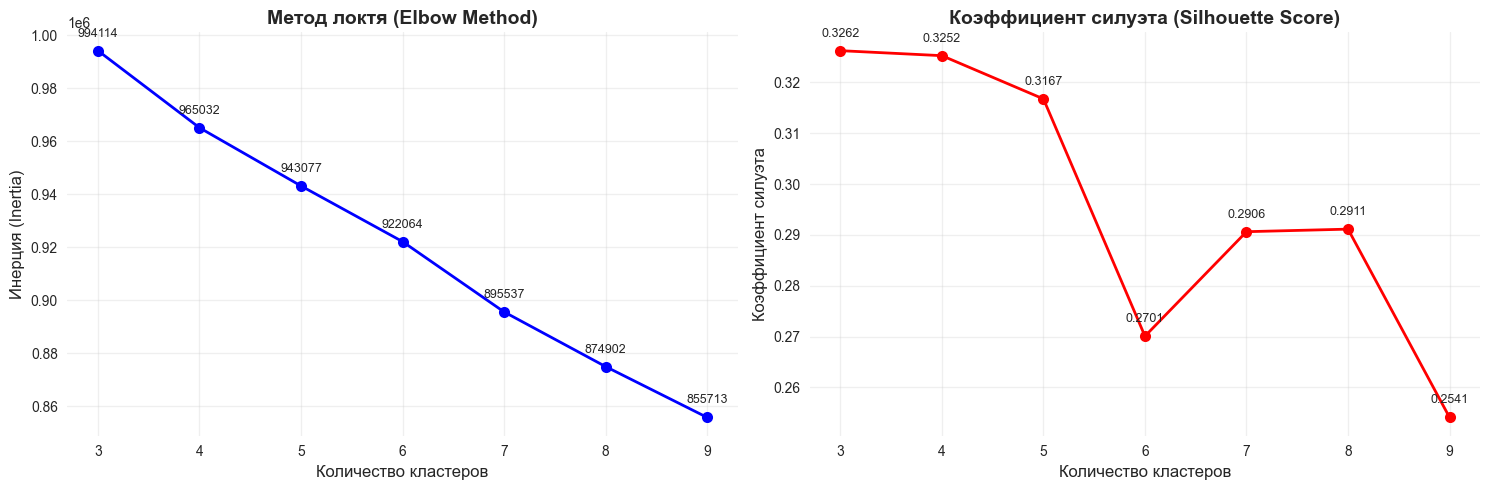

РЕЗУЛЬТАТЫ АНАЛИЗА:

1. МЕТОД ЛОКТЯ:
   Оптимальное количество кластеров: 9
   Инерция при 9 кластерах: 855713.42

   Все значения инерции:
   3 кластеров: 994114.28
   4 кластеров: 965032.25
   5 кластеров: 943076.87
   6 кластеров: 922064.22
   7 кластеров: 895536.56
   8 кластеров: 874901.79
   9 кластеров: 855713.42

2. КОЭФФИЦИЕНТ СИЛУЭТА:
   Оптимальное количество кластеров: 3
   Коэффициент силуэта при 3 кластерах: 0.3262

   Все значения коэффициента силуэта:
   3 кластеров: 0.3262
   4 кластеров: 0.3252
   5 кластеров: 0.3167
   6 кластеров: 0.2701
   7 кластеров: 0.2906
   8 кластеров: 0.2911
   9 кластеров: 0.2541


In [45]:
# Визуализация результатов и определение оптимального количества кластеров

# Создаем фигуру с двумя подграфиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# График 1: Метод локтя (Elbow Method)
ax1.plot(n_clusters_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Количество кластеров', fontsize=12)
ax1.set_ylabel('Инерция (Inertia)', fontsize=12)
ax1.set_title('Метод локтя (Elbow Method)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(list(n_clusters_range))

# Добавляем значения на график
for i, (n, inertia) in enumerate(zip(n_clusters_range, inertias)):
    ax1.annotate(f'{inertia:.0f}', (n, inertia), 
                textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

# График 2: Коэффициент силуэта
ax2.plot(n_clusters_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Количество кластеров', fontsize=12)
ax2.set_ylabel('Коэффициент силуэта', fontsize=12)
ax2.set_title('Коэффициент силуэта (Silhouette Score)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(list(n_clusters_range))

# Добавляем значения на график
for i, (n, score) in enumerate(zip(n_clusters_range, silhouette_scores)):
    ax2.annotate(f'{score:.4f}', (n, score), 
                textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Определяем оптимальное количество кластеров

# 1. Метод локтя: находим количество кластеров с наименьшей инерцией
# (согласно заданию: если локоть не идентифицируется однозначно, берем наименьшую инерцию)
min_inertia_idx = np.argmin(inertias)
optimal_elbow = list(n_clusters_range)[min_inertia_idx]

# 2. Коэффициент силуэта: находим максимальное значение
max_silhouette_idx = np.argmax(silhouette_scores)
optimal_silhouette = list(n_clusters_range)[max_silhouette_idx]

# Если есть несколько одинаковых максимальных значений, берем наименьшее
max_silhouette_value = silhouette_scores[max_silhouette_idx]
# Находим все индексы с максимальным значением
max_indices = [i for i, score in enumerate(silhouette_scores) if abs(score - max_silhouette_value) < 1e-10]
if len(max_indices) > 1:
    optimal_silhouette = list(n_clusters_range)[min(max_indices)]

print("="*60)
print("РЕЗУЛЬТАТЫ АНАЛИЗА:")
print("="*60)
print(f"\n1. МЕТОД ЛОКТЯ:")
print(f"   Оптимальное количество кластеров: {optimal_elbow}")
print(f"   Инерция при {optimal_elbow} кластерах: {inertias[min_inertia_idx]:.2f}")
print(f"\n   Все значения инерции:")
for n, inertia in zip(n_clusters_range, inertias):
    print(f"   {n} кластеров: {inertia:.2f}")

print(f"\n2. КОЭФФИЦИЕНТ СИЛУЭТА:")
print(f"   Оптимальное количество кластеров: {optimal_silhouette}")
print(f"   Коэффициент силуэта при {optimal_silhouette} кластерах: {silhouette_scores[max_silhouette_idx]:.4f}")
print(f"\n   Все значения коэффициента силуэта:")
for n, score in zip(n_clusters_range, silhouette_scores):
    print(f"   {n} кластеров: {score:.4f}")
print("="*60)


## Задание 4.6
2 points possible (graded)
Мы будем использовать результаты, полученные в предыдущем задании с помощью коэффициента силуэта.

Реализуйте сегментацию подростков на выбранном количестве кластеров.

Для каждого кластера составьте топ-10 самых частых слов, назовём их ключевыми. Для этого сгруппируйте данные по кластерам, в каждом кластере вычислите среднее по каждому признаку, отсортируйте данные по убыванию и выделите первые 10 строк.

Найдите среди ключевых слов те, которые характерны для каждого кластера, то есть встречаются в каждом из них.

Отметьте эти слова:


A music
B dance
C shopping
D god
E cute
F hair
G church
H basketball
I mall
J football

In [46]:
# Используем оптимальное количество кластеров из коэффициента силуэта
print(f"Используем оптимальное количество кластеров: {optimal_silhouette}\n")

# Создаем и обучаем модель KMeans с оптимальным количеством кластеров
kmeans_optimal = KMeans(n_clusters=optimal_silhouette, random_state=42, n_init=10)
kmeans_optimal.fit(X_norm)

# Получаем метки кластеров
labels_optimal = kmeans_optimal.labels_

# Добавляем метки кластеров к исходным данным (df_keywords)
df_clustered = df_keywords.copy()
df_clustered['cluster'] = labels_optimal

print(f"Количество наблюдений в каждом кластере:")
cluster_counts = df_clustered['cluster'].value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    print(f"Кластер {cluster_id}: {count} подростков")
print()

# Группируем данные по кластерам и вычисляем средние значения по каждому признаку
cluster_means = df_clustered.groupby('cluster').mean()

print("="*60)
print("ТОП-10 КЛЮЧЕВЫХ СЛОВ ДЛЯ КАЖДОГО КЛАСТЕРА:")
print("="*60)

# Словарь для хранения топ-10 слов каждого кластера
top_words_per_cluster = {}

# Для каждого кластера находим топ-10 слов
for cluster_id in sorted(cluster_means.index):
    # Получаем средние значения для данного кластера
    cluster_data = cluster_means.loc[cluster_id]
    
    # Сортируем по убыванию и берем топ-10
    top_10 = cluster_data.sort_values(ascending=False).head(10)
    
    # Сохраняем список слов
    top_words_per_cluster[cluster_id] = top_10.index.tolist()
    
    print(f"\nКластер {cluster_id}:")
    for i, (word, value) in enumerate(top_10.items(), 1):
        print(f"  {i}. {word}: {value:.4f}")

print("\n" + "="*60)
print("АНАЛИЗ ХАРАКТЕРНЫХ СЛОВ:")
print("="*60)

# Находим слова, которые встречаются в топ-10 всех кластеров
all_clusters = set(top_words_per_cluster.keys())
common_words = set(top_words_per_cluster[list(all_clusters)[0]])

for cluster_id in all_clusters:
    common_words = common_words.intersection(set(top_words_per_cluster[cluster_id]))

print(f"\nСлова, встречающиеся в топ-10 всех кластеров ({len(common_words)} слов):")
for word in sorted(common_words):
    print(f"  - {word}")

print("\n" + "="*60)
print("СООТВЕТСТВИЕ С ПРЕДЛОЖЕННЫМИ ВАРИАНТАМИ:")
print("="*60)

# Список предложенных слов
proposed_words = {
    'A': 'music',
    'B': 'dance',
    'C': 'shopping',
    'D': 'god',
    'E': 'cute',
    'F': 'hair',
    'G': 'church',
    'H': 'basketball',
    'I': 'mall',
    'J': 'football'
}

print("\nХарактерные слова из предложенного списка:")
for letter, word in proposed_words.items():
    if word in common_words:
        print(f"  ✓ {letter}. {word} - ВСТРЕЧАЕТСЯ ВО ВСЕХ КЛАСТЕРАХ")
    else:
        print(f"  ✗ {letter}. {word} - не встречается во всех кластерах")


INFO:sklearnex: sklearn.cluster.KMeans.fit: running accelerated version on CPU
13:01:22 | INFO     | logging:callHandlers - sklearn.cluster.KMeans.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
13:01:22 | INFO     | logging:callHandlers - sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


Используем оптимальное количество кластеров: 3

Количество наблюдений в каждом кластере:
Кластер 0: 5991 подростков
Кластер 1: 22886 подростков
Кластер 2: 1123 подростков

ТОП-10 КЛЮЧЕВЫХ СЛОВ ДЛЯ КАЖДОГО КЛАСТЕРА:

Кластер 0:
  1. music: 1.0599
  2. dance: 0.9940
  3. shopping: 0.9306
  4. god: 0.8843
  5. cute: 0.7949
  6. hair: 0.7334
  7. church: 0.6655
  8. basketball: 0.6647
  9. mall: 0.6568
  10. football: 0.5944

Кластер 1:
  1. music: 0.5788
  2. god: 0.3293
  3. dance: 0.2506
  4. band: 0.2377
  5. hair: 0.2032
  6. shopping: 0.1911
  7. cute: 0.1801
  8. rock: 0.1643
  9. soccer: 0.1513
  10. football: 0.1495

Кластер 2:
  1. hair: 3.2342
  2. sex: 2.4399
  3. music: 2.2600
  4. kissed: 1.5806
  5. die: 1.2164
  6. rock: 1.1184
  7. god: 1.0018
  8. drugs: 0.9608
  9. dance: 0.9484
  10. band: 0.9279

АНАЛИЗ ХАРАКТЕРНЫХ СЛОВ:

Слова, встречающиеся в топ-10 всех кластеров (4 слов):
  - dance
  - god
  - hair
  - music

СООТВЕТСТВИЕ С ПРЕДЛОЖЕННЫМИ ВАРИАНТАМИ:

Характерные сл

## Задание 4.7
1 point possible (graded)
Итак, с k-means мы потренировались — теперь перейдём к EM-алгоритму.

Реализуйте EM-алгоритм (GaussianMixture) для такого же количества кластеров, как и в предыдущем задании. В качестве значения параметра random_state возьмите число 42.

Сколько подростков алгоритм отнёс к самому многочисленному кластеру?

In [50]:
# Импортируем GaussianMixture для EM-алгоритма
from sklearn.mixture import GaussianMixture

# Используем то же количество кластеров, что и в предыдущем задании (optimal_silhouette)
print(f"Используем количество кластеров: {optimal_silhouette}\n")

# Создаем модель GaussianMixture с оптимальным количеством кластеров и random_state=42
gmm = GaussianMixture(n_components=optimal_silhouette, random_state=42)

# Обучаем модель на нормализованных данных
gmm.fit(X_norm)

# Получаем метки кластеров (predict)
labels_gmm = gmm.predict(X_norm)

# Подсчитываем количество наблюдений в каждом кластере
unique, counts = np.unique(labels_gmm, return_counts=True)
cluster_counts_gmm = dict(zip(unique, counts))

print("Количество наблюдений в каждом кластере:")
for cluster_id in sorted(cluster_counts_gmm.keys()):
    print(f"Кластер {cluster_id}: {cluster_counts_gmm[cluster_id]} подростков")

# Находим самый многочисленный кластер
max_cluster_id = max(cluster_counts_gmm, key=cluster_counts_gmm.get)
max_count = cluster_counts_gmm[max_cluster_id]

print(f"\n{'='*60}")
print(f"Самый многочисленный кластер: {max_cluster_id}")
print(f"Количество подростков: {max_count}")
print(f"{'='*60}")


Используем количество кластеров: 3

Количество наблюдений в каждом кластере:
Кластер 0: 2874 подростков
Кластер 1: 20670 подростков
Кластер 2: 6456 подростков

Самый многочисленный кластер: 1
Количество подростков: 20670


## Задание 4.8
0.0/1.0 point (graded)
В одном из кластеров оказался всего один человек. Давайте узнаем, что это за подросток и чем он(а) интересуется.

Отметьте три слова, которые чаще всего встречаются в сообщениях этого подростка:

In [51]:
# Ищем кластер с одним человеком в результатах GaussianMixture
single_person_cluster_gmm = None
for cluster_id, count in cluster_counts_gmm.items():
    if count == 1:
        single_person_cluster_gmm = cluster_id
        break

# Также проверяем результаты k-means (из задания 4.4 был кластер с 1 человеком)
single_person_cluster_kmeans = None
if 'kmeans' in globals():
    labels_kmeans = kmeans.labels_
    unique_kmeans, counts_kmeans = np.unique(labels_kmeans, return_counts=True)
    cluster_counts_kmeans = dict(zip(unique_kmeans, counts_kmeans))
    for cluster_id, count in cluster_counts_kmeans.items():
        if count == 1:
            single_person_cluster_kmeans = cluster_id
            break

# Используем результаты GaussianMixture, если есть кластер с одним человеком
# Иначе используем результаты k-means
if single_person_cluster_gmm is not None:
    print(f"Найден кластер с одним человеком в GaussianMixture: кластер {single_person_cluster_gmm}\n")
    labels_to_use = labels_gmm
    cluster_id_to_use = single_person_cluster_gmm
elif single_person_cluster_kmeans is not None:
    print(f"Найден кластер с одним человеком в k-means: кластер {single_person_cluster_kmeans}\n")
    labels_to_use = labels_kmeans
    cluster_id_to_use = single_person_cluster_kmeans
else:
    print("⚠️  Не найден кластер с одним человеком ни в GaussianMixture, ни в k-means.")
    print("Проверяем все кластеры GaussianMixture:")
    for cluster_id, count in sorted(cluster_counts_gmm.items()):
        print(f"  Кластер {cluster_id}: {count} человек")
    if 'kmeans' in globals():
        print("\nПроверяем все кластеры k-means:")
        for cluster_id, count in sorted(cluster_counts_kmeans.items()):
            print(f"  Кластер {cluster_id}: {count} человек")
    raise ValueError("Не найден кластер с одним человеком")

# Находим индекс этого подростка
person_indices = np.where(labels_to_use == cluster_id_to_use)[0]
person_index = person_indices[0]

print(f"Индекс подростка в датасете: {person_index}")
print(f"Это строка {person_index + 1} в исходном датасете\n")

# Получаем данные этого подростка (из исходного датасета df_keywords)
person_data = df_keywords.iloc[person_index]

print("="*60)
print("ДАННЫЕ ПОДРОСТКА:")
print("="*60)
print(f"\nВсе значения частоты слов:")
for word, value in person_data.items():
    print(f"  {word}: {value}")

# Сортируем слова по убыванию частоты и берем топ-3
top_3_words = person_data.sort_values(ascending=False).head(3)

print(f"\n{'='*60}")
print("ТОП-3 САМЫХ ЧАСТЫХ СЛОВ В СООБЩЕНИЯХ ЭТОГО ПОДРОСТКА:")
print("="*60)
for i, (word, value) in enumerate(top_3_words.items(), 1):
    print(f"{i}. {word}: {value}")
print("="*60)


Найден кластер с одним человеком в k-means: кластер 7

Индекс подростка в датасете: 4129
Это строка 4130 в исходном датасете

ДАННЫЕ ПОДРОСТКА:

Все значения частоты слов:
  basketball: 0
  football: 0
  soccer: 0
  softball: 0
  volleyball: 0
  swimming: 0
  cheerleading: 0
  baseball: 0
  tennis: 0
  sports: 0
  cute: 0
  sex: 114
  sexy: 0
  hot: 0
  kissed: 0
  dance: 0
  band: 0
  marching: 0
  music: 1
  rock: 1
  god: 0
  church: 10
  jesus: 0
  bible: 0
  hair: 0
  dress: 0
  blonde: 0
  mall: 0
  shopping: 0
  clothes: 0
  hollister: 0
  abercrombie: 0
  die: 0
  death: 1
  drunk: 0
  drugs: 0

ТОП-3 САМЫХ ЧАСТЫХ СЛОВ В СООБЩЕНИЯХ ЭТОГО ПОДРОСТКА:
1. sex: 114
2. church: 10
3. music: 1
